**OBJECTIVE**

The main aim of this project is to analyze the dataset and build the model to predict the minimum and maximum salary.

**DATASET LINK**

https://drive.google.com/file/d/1TupHedFTNQ_1PRe-EGxqE4S_cV4N1UyX/view?usp=sharing


**IMPORT LIBRARY AND READ THE DATASET**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Data_Science_Jobs_in_India.csv')

In [3]:
df.head()

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8L,4.5L,16.0L,841
1,1,Accenture,Data Scientist,2,12.8L,5.8L,23.0L,501
2,2,IBM,Data Scientist,2,13.4L,5.3L,25.0L,394
3,3,Cognizant,Data Scientist,2,9.8L,5.0L,18.0L,318
4,4,Capgemini,Data Scientist,2,8.6L,4.8L,14.6L,300


**DESCRIBE DATA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1602 non-null   int64 
 1   company_name     1602 non-null   object
 2   job_title        1602 non-null   object
 3   min_experience   1602 non-null   int64 
 4   avg_salary       1602 non-null   object
 5   min_salary       1602 non-null   object
 6   max_salary       1602 non-null   object
 7   num_of_salaries  1602 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 100.2+ KB


Using the info() function we can see that there are no null values present in the dataset

In [5]:
df.describe()

,Unnamed: 0,min_experience,num_of_salaries
count,1602.000000,1602.000000,1602.000000
mean,800.500000,2.799001,58.055556
std,462.601881,2.353686,169.042138
min,0.000000,0.000000,3.000000
25%,400.250000,1.000000,9.250000
50%,800.500000,2.000000,22.000000
75%,1200.750000,4.000000,47.000000
max,1601.000000,21.000000,4200.000000


**DATA VISUALIZATION**

**AVERAGE SALARY BY JOB TITLE**





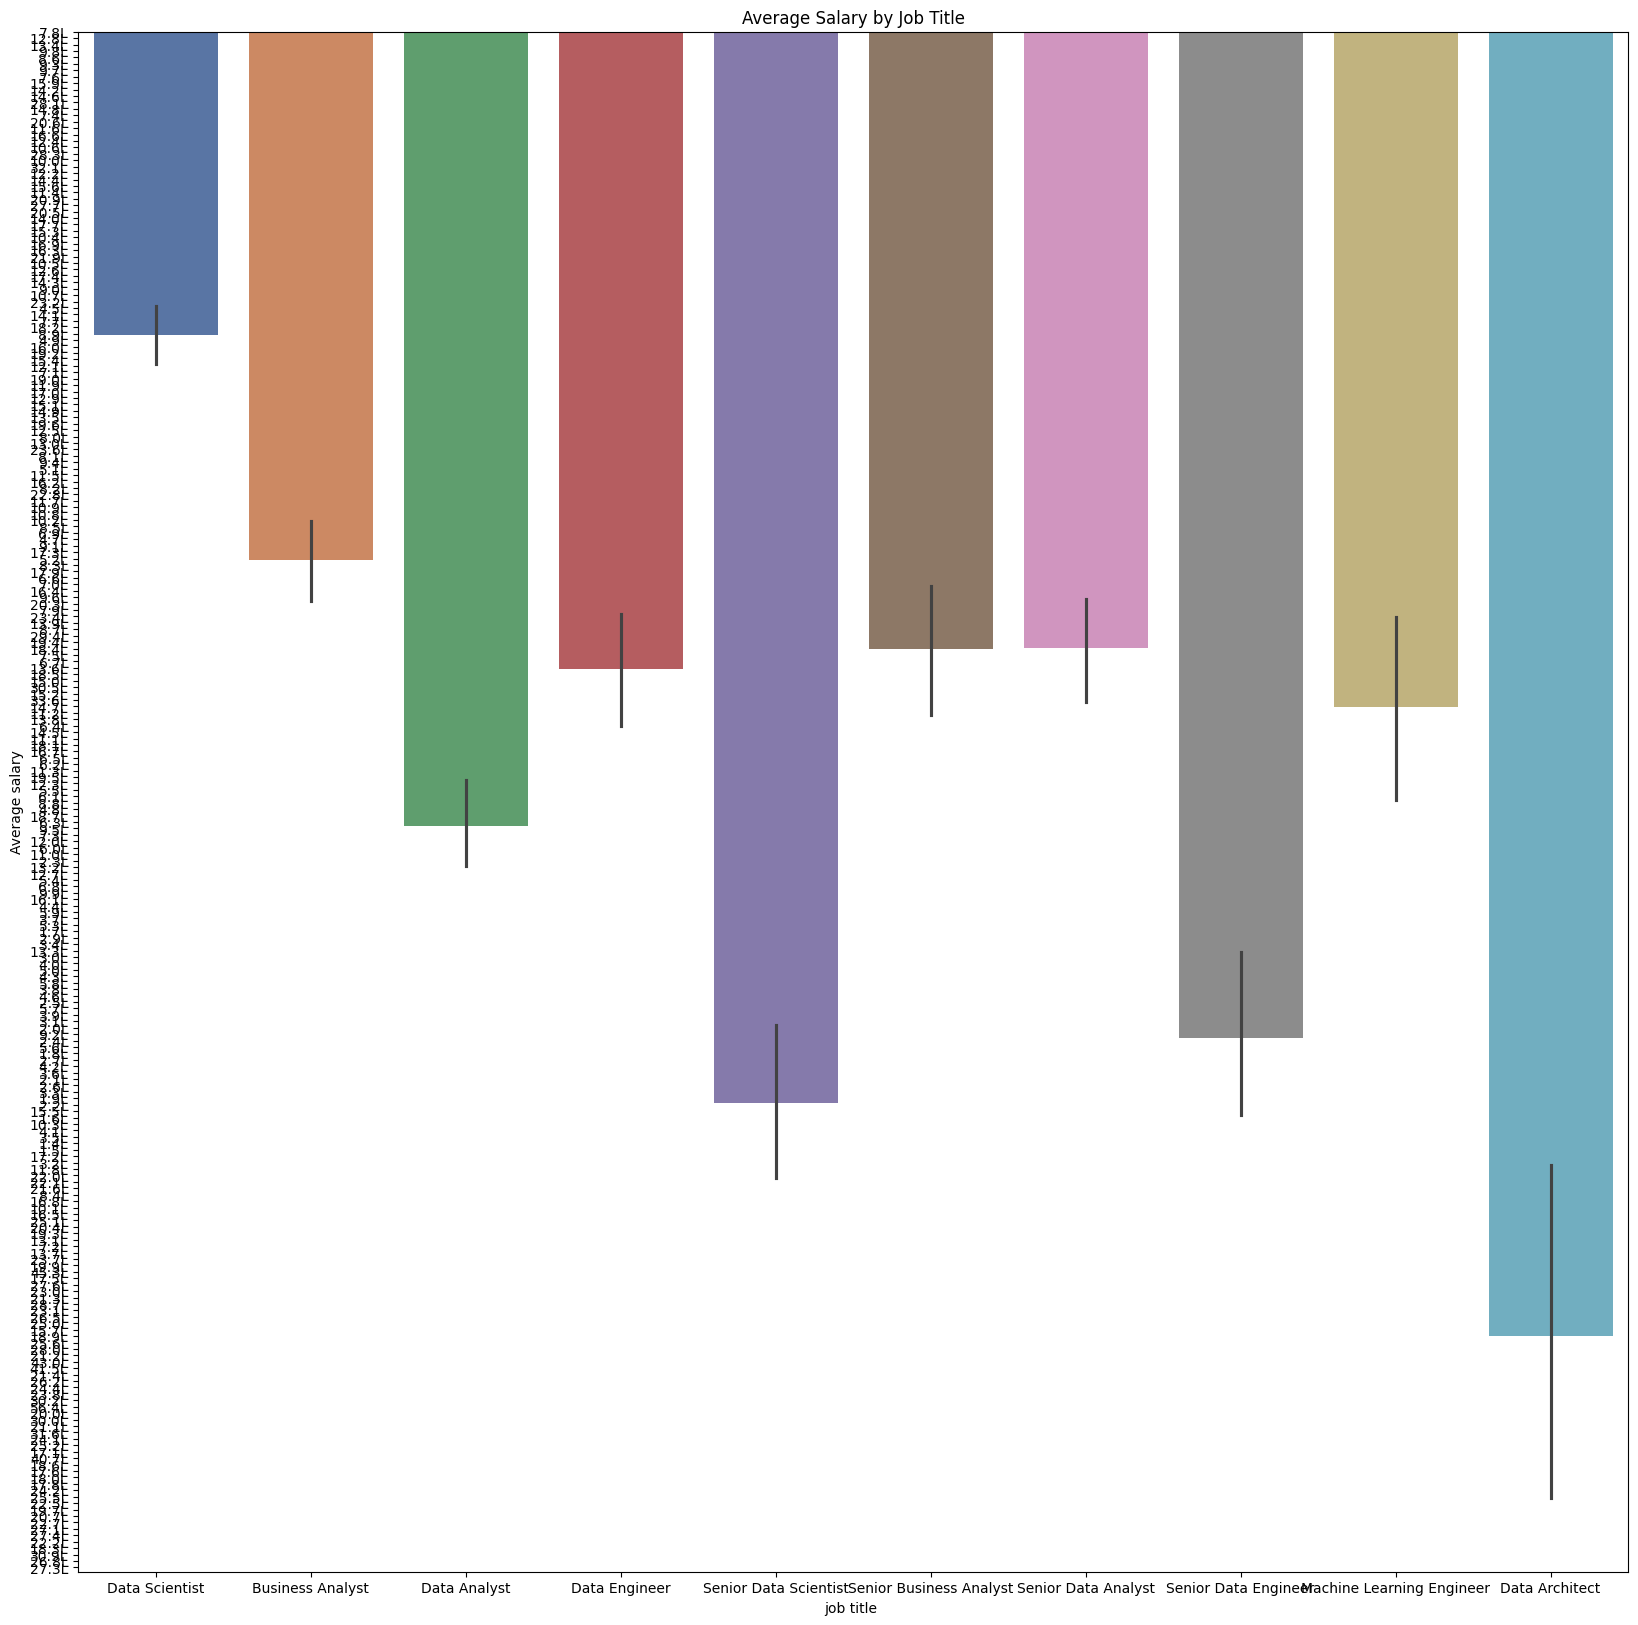

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.barplot(x='job_title',y='avg_salary',hue="job_title", data=df, estimator=lambda x: sum(x) / len(x), palette='deep')
plt.title('Average Salary by Job Title')
plt.xlabel('job title ')
plt.ylabel('Average salary')
plt.show()

The highest average salary is for Data Architect

**JOB TITLE BY MINIMUM EXPERIENCE**

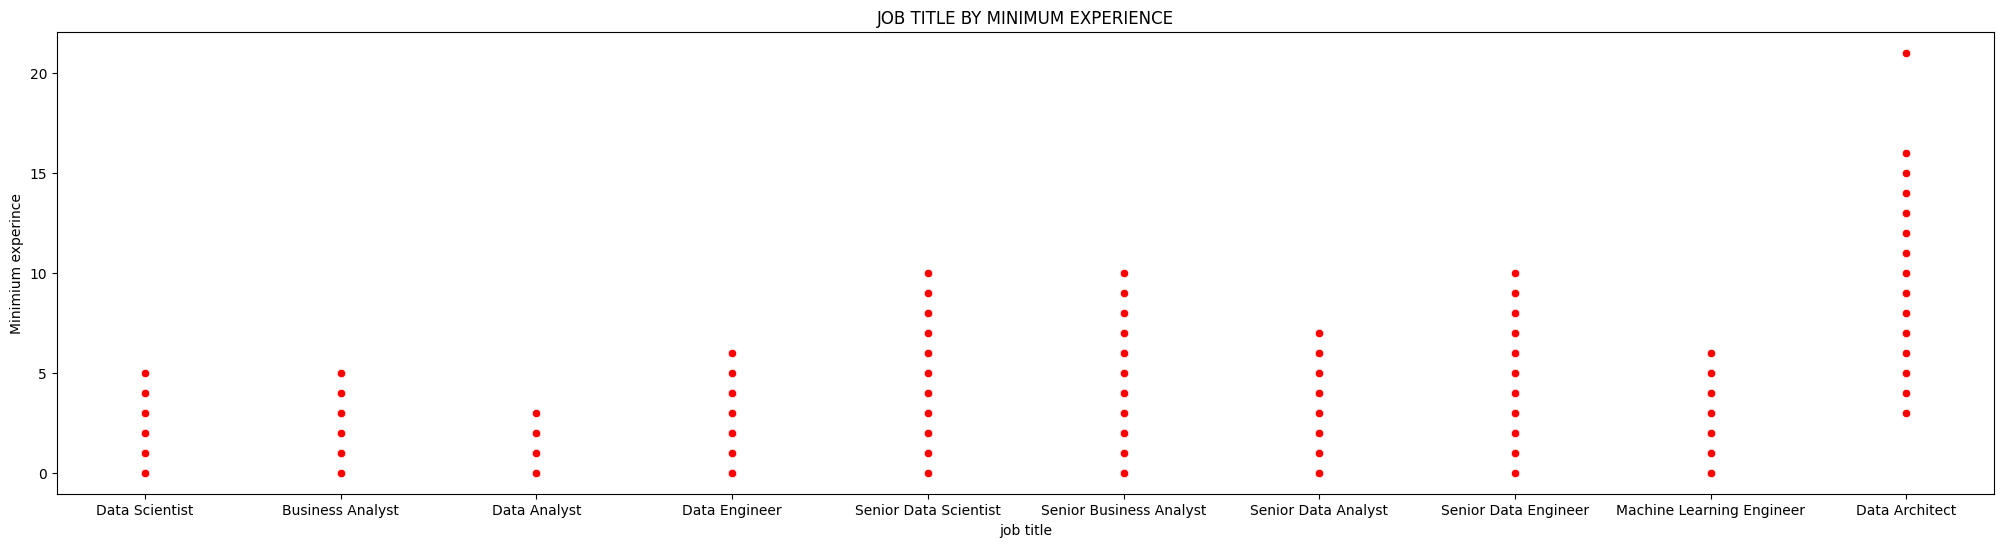

In [7]:
plt.figure(figsize=(25,6))
sns.scatterplot(x='job_title', y='min_experience', data=df, color="red")
plt.title('JOB TITLE BY MINIMUM EXPERIENCE')
plt.xlabel('job title')
plt.ylabel('Minimium experince')
plt.show()

The lowest minimum experience is needed for Data Analyst role and the highest minimum experience is for Data Architect.

**DATA PREPROCESSING**

In [8]:
# Checking for null values
df.isna().sum()

,0
Unnamed: 0,0
company_name,0
job_title,0
min_experience,0
avg_salary,0
min_salary,0
max_salary,0
num_of_salaries,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Unnamed: 0', 'company_name', 'job_title', 'min_experience',
       'avg_salary', 'min_salary', 'max_salary', 'num_of_salaries'],
      dtype='object')

In [11]:
df['job_title'].unique()

array(['Data Scientist', 'Business Analyst', 'Data Analyst',
       'Data Engineer', 'Senior Data Scientist',
       'Senior Business Analyst', 'Senior Data Analyst',
       'Senior Data Engineer', 'Machine Learning Engineer',
       'Data Architect'], dtype=object)

In [12]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,188
Business Analyst,188
Data Engineer,188
Data Analyst,187
Senior Business Analyst,187
Senior Data Analyst,187
Senior Data Scientist,185
Senior Data Engineer,183
Machine Learning Engineer,59


In [13]:
df['min_experience'].value_counts()

,count
min_experience,
1,358
2,356
3,233
4,191
0,170
5,125
6,55
7,48
8,27


In [14]:
df.drop(['Unnamed: 0','company_name','avg_salary','num_of_salaries'],axis=1,inplace=True)

In [15]:
df.head()

,job_title,min_experience,min_salary,max_salary
0,Data Scientist,2,4.5L,16.0L
1,Data Scientist,2,5.8L,23.0L
2,Data Scientist,2,5.3L,25.0L
3,Data Scientist,2,5.0L,18.0L
4,Data Scientist,2,4.8L,14.6L


Encoding Categorical variables i.e job title

According to this dataset we will label encode the 'Job Title' as it is ordinal in nature

In [16]:
# Label encoding the Education level column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job_title'] = le.fit_transform(df['job_title'])

In [17]:
df

,job_title,min_experience,min_salary,max_salary
0,4,2,4.5L,16.0L
1,4,2,5.8L,23.0L
2,4,2,5.3L,25.0L
3,4,2,5.0L,18.0L
4,4,2,4.8L,14.6L
...,...,...,...,...
1597,2,8,12.0L,23.1L
1598,2,7,18.5L,39.0L
1599,2,21,25.0L,50.0L
1600,2,7,14.9L,19.0L


**DEFINE TARGET VARIABLE (y) and FEATURE VARIABLES (X)**

In [18]:
df.columns

Index(['job_title', 'min_experience', 'min_salary', 'max_salary'], dtype='object')

In [19]:
y = df[['min_salary','max_salary']]
x = df[['job_title','min_experience']]

**MODEL TRAINING AND EVALUATION**

**TRAIN TEST SPLIT**

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, random_state= 2529)


**MODELING**

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

**TRAIN MODEL**

In [22]:
import pandas as pd

# Function to convert salaries with "L" to numeric values
def convert_salary(salary_series):
    return salary_series.astype(str).str.replace('L', '', regex=False).astype(float) * 100000

# Check if y_train is a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train['min_salary'] = convert_salary(y_train['min_salary'])
    y_train['max_salary'] = convert_salary(y_train['max_salary'])
else:
    y_train = convert_salary(y_train)

# Getting min and max salaries
min_salary_output = y_train['min_salary'].sum() / 100000  # Convert back to lakhs
max_salary_output = y_train['max_salary'].sum() / 100000  # Convert back to lakhs

# Format the output to show only the first two digits
min_salary_display = str(int(min_salary_output))[:2] + " L"
max_salary_display = str(int(max_salary_output))[:2] + " L"

# Example output
print(f'Predicted Minimum Annual Salary: ₹{min_salary_display}')
print(f'Predicted Maximum Annual Salary: ₹{max_salary_display}')




Predicted Minimum Annual Salary: ₹10 L
Predicted Maximum Annual Salary: ₹23 L


In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [25]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

**MODEL PREDICTING**

In [27]:
y_pred_lr = lr.predict(x_test)

y_pred_knnr = knnr.predict(x_test)

y_pred_dtr = dtr.predict(x_test)

y_pred_rfr = rfr.predict(x_test)

**MODEL EVALUATION**

In [28]:
import pandas as pd

# Function to convert salaries with "L" to numeric values
def convert_salary(salary_series):
    return salary_series.astype(str).str.replace('L', '', regex=False).astype(float) * 100000

# Check if y_train is a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_test['min_salary'] = convert_salary(y_test['min_salary'])
    y_test['max_salary'] = convert_salary(y_test['max_salary'])

else:
    y_test = convert_salary(y_test)

# Getting min and max salaries
min_salary_output = y_test['min_salary'].sum() / 100000  # Convert back to lakhs
max_salary_output = y_test['max_salary'].sum() / 100000  # Convert back to lakhs

# Format the output to show only the first two digits
min_salary_display = str(int(min_salary_output))[:2] + " L"
max_salary_display = str(int(max_salary_output))[:2] + " L"

# Example output
print(f'Predicted Minimum Annual Salary: ₹{min_salary_display}')
print(f'Predicted Maximum Annual Salary: ₹{max_salary_display}')



Predicted Minimum Annual Salary: ₹35 L
Predicted Maximum Annual Salary: ₹75 L


**LINEAR REGRESSION**

In [29]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

print(mean_absolute_percentage_error(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(mean_squared_error(y_test,y_pred_lr))

0.5116797884210897
465853.5461310885
405306802616.39355


**KNN REGRESSION**

In [30]:
print(mean_absolute_percentage_error(y_test,y_pred_knnr))
print(mean_absolute_error(y_test,y_pred_knnr))
print(mean_squared_error(y_test,y_pred_knnr))


0.49630547536098646
471775.56109725684
447964728179.55115


**DECISION TREE REGRESSION**

In [31]:
print(mean_absolute_percentage_error(y_test,y_pred_dtr))
print(mean_absolute_error(y_test,y_pred_dtr))
print(mean_squared_error(y_test,y_pred_dtr))

0.43292748089076455
415064.23811127257
356956601466.1174


**RANDOM FOREST REGRESSION**

In [32]:
print(mean_absolute_percentage_error(y_test,y_pred_rfr))
print(mean_absolute_error(y_test,y_pred_rfr))
print(mean_squared_error(y_test,y_pred_rfr))

0.42710959196033504
411513.97004616476
346766373736.2695


Random Forest Regression (RFR) model is the best overall model, as it has the lowest MAPE, MAE and MSE.

**SAVING THE MODEL**

In [33]:
from joblib import dump,load
dump(rfr, 'trained_model.joblib')

['trained_model.joblib']

**PYTHON CODE FOR WEB APP**

In [34]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [35]:
pip install streamlit-option-menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 12.5 MB/s eta 0:00:00


In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
from joblib import load
from streamlit_option_menu import option_menu

# Load the trained model
model_path = 'trained_model.joblib'
loaded_model = load(model_path)

# Function to set page background color
def set_background_color(color):
    st.markdown(
        f"""
        <style>
        .reportview-container {{
            background-color: {color};
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Set the page configuration
st.set_page_config(
    page_title="Salary Prediction",
    page_icon="📊",
    layout="wide"
)

# Set the background color for the entire app (default)
set_background_color("#f0f2f5")  # Light grey background

# Sidebar for navigation
with st.sidebar:
    st.title("Prediction App")
    page = option_menu(
        menu_title=None,
        options=["Home", "About", "Salary Prediction"],
        icons=["house", "info-circle", "graph-up-arrow"],
        menu_icon="cast",
        default_index=0,
        styles={
            "container": {"padding": "0!important", "background-color": 'transparent'},
            "icon": {"color": "black", "font-size": "18px"},
            "nav-link": {"color": "black", "font-size": "16px", "text-align": "left", "margin": "0px", "margin-bottom": "15px"},
            "nav-link-selected": {"background-color": "#7B06A6", "font-size": "15px"},
        }
    )
    st.write("***")

if page == "Home":


    st.title("Welcome to the Salary Prediction App")
    st.write("This app predicts the minimum and maximum salary based on job title and minimum years of experience.")
    st.write("Navigate to the About page to learn more or to the Salary Prediction page to make predictions.")

elif page == "About":


    st.title("About This App")
    st.write("""\
        The Salary Prediction App is designed to provide minimum and maximum salary based on the following parameters:
        - Job Title: The title of the job position.
        - Minimum Years of Experience: The minimum years of relevant work experience.

        This app uses a machine learning model trained on historical salary data to make predictions.
    """)

elif page == "Salary Prediction":
    st.title('Salary Prediction')

    # Input fields for user
    job_title = st.selectbox('Job Title', [
        'Data Scientist', 'Business Analyst', 'Data Analyst',
        'Data Engineer', 'Senior Data Scientist',
        'Senior Business Analyst', 'Senior Data Analyst',
        'Senior Data Engineer', 'Machine Learning Engineer',
        'Data Architect'
    ])

    min_experience = st.number_input('Minimum Years of Experience', min_value=0, step=1)

    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'job_title': [job_title],
        'min_experience': [min_experience]
    })

    # One-hot encode the job_title
    input_data_encoded = pd.get_dummies(input_data, columns=['job_title'])

    # Ensure the input data has the same columns as the model's training data
    model_columns = loaded_model.feature_names_in_  # Feature names used in training
    input_data_encoded = input_data_encoded.reindex(columns=model_columns, fill_value=0)

    st.markdown(
        """
        <style>
        div.stButton > button {
            background-color: #7B06A6;  /* Purple background */
            color: white;  /* White text */
            border-radius: 8px;
            padding: 10px;
            font-size: 16px;
        }
        div.stButton > button:hover {
            background-color: #7B06A6 !important; /* Purple background on hover (no change) */
            color: white !important;
            border: none !important;
        }
        div.stButton > button:focus {
            background-color: #7B06A6 !important;  /* Maintain purple on focus */
            color: white !important;
            border: none !important;
        }
        </style>
        """,
        unsafe_allow_html=True
    )


    # Make prediction
    if st.button('Predict Salary'):
        # Make prediction
        prediction = loaded_model.predict(input_data_encoded)
        min_salary_in_inr = prediction[0][0]  # Minimum salary predicted
        max_salary_in_inr = prediction[0][1]  # Maximum salary predicted

        # Display the predicted salary range in two columns
        col1, col2 = st.columns(2)

        with col1:
            st.image("minimum_img.png", use_column_width=False, width=70)
            st.markdown(f"### Predicted Minimum Annual Salary")
            st.write(f'**₹{min_salary_in_inr:,.2f} INR**')

        with col2:
            st.image("maximum_image.png", use_column_width=False, width=70)  # Reduce image size by specifying width
            st.markdown(f"### Predicted Maximum Annual Salary")
            st.write(f'**₹{max_salary_in_inr:,.2f} INR**')


Writing app.py
